<a href="https://colab.research.google.com/github/Anjali001/GRIP_Tasks/blob/master/KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-means Clustering**

This is an unsupervised algorithm which is used when we have unlabelled data. The goal of this algorithm is to find groups in data (number of groups is represented by K).

Mathematically, this algorithm separates n points into k groups, where k<=n.

First, a set of k random points are chosen as centroids. Now , rest of the points are assigned to closest cluster centroid.Then again, centroid of newly formed cluster i sfound and whole process is repated. This keeps on repeating until centroid of newly formed clusters is same OR maxiumum number of iterations reached OR points don'e change in cluster.

It has various applications like customer segmentation,recommendation engine etc..








---


### **Author:**
Anjali Pal

Data Science and Analytics Intern 

The Sparks Foundation


---



### Problem Statement:
From the given ‘Iris’ dataset, predict the optimum number of
clusters and represent it visually.
Dataset:https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing

### Step 1: Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
%matplotlib inline

### Step 2: Reading data

In [ ]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data,columns= iris.feature_names )
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Step 3: Preparing Data

In [ ]:
x = data.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
inertia_values = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    inertia_values.append(kmeans.inertia_)

In [ ]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

### Step 4: Finding optimal number of clusters

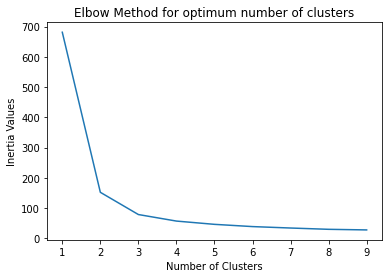

In [ ]:
plt.plot(range(1,10),inertia_values)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Values')
plt.title('Elbow Method for optimum number of clusters')
plt.show()

To determine the optimal number of clusters, select the value of k at the “elbow” i.e. the point after which the inertia start decreasing in a linear fashion. 

Thus for the given data, we conclude that the optimal number of clusters for the data is 3.

### Step 6: Representing clusters visually

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
#print(x[y_kmeans==0])

In [ ]:
print(kmeans.cluster_centers_)

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


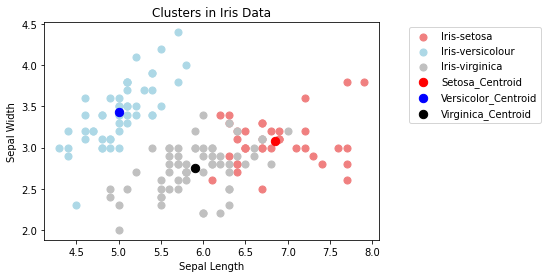

In [ ]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'lightcoral', label = 'Iris-setosa') # Flower names can be seen in description
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'lightblue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 50, c = 'silver', label = 'Iris-virginica')
#I've plotted this based on sepal length and sepal width . 
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Clusters in Iris Data')
plt.scatter(kmeans.cluster_centers_[0,0],kmeans.cluster_centers_[0,1],label ='Setosa_Centroid',c='red',s=70 )
plt.scatter(kmeans.cluster_centers_[1,0],kmeans.cluster_centers_[1,1],label ='Versicolor_Centroid',c='Blue',s=70 )
plt.scatter(kmeans.cluster_centers_[2,0],kmeans.cluster_centers_[2,1],label ='Virginica_Centroid',c='black',s=70 )
plt.legend(loc='upper right',bbox_to_anchor=(1.5, 1))
plt.show()
